In [109]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.signal as sig

%matplotlib inline

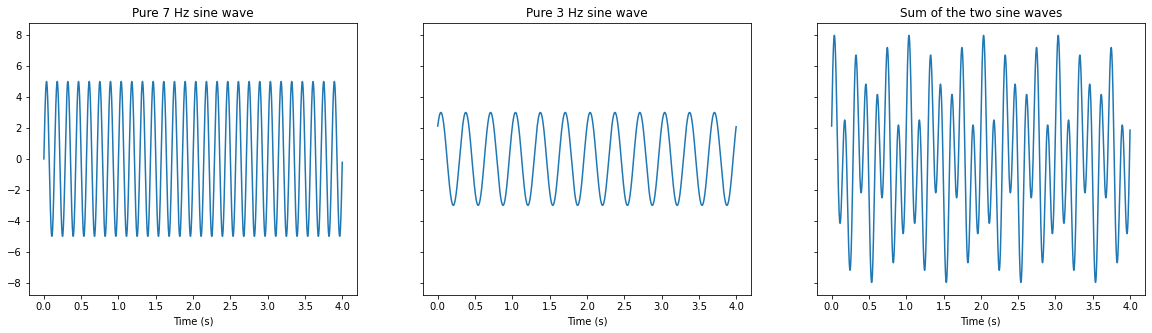

In [110]:
dt = 1/1000                                    # frequency resolution
T = 4                                          # total duration of data
x = np.arange(0, T, dt)                        # time of samples 
signals = np.zeros((x.shape[0],3))                   # generate empty array
f1, f2 = 7, 3                                  # define signal frequencies

signals[:,0] = 5*np.sin(x*math.pi*2*f1)              # create first pure sine
signals[:,1] = 3*np.sin(x*math.pi*2*f2+math.pi/4)              # create second pure sine
signals[:,2] = signals[:,0] + signals[:,1]                       # create the combined signal
#  plot signals:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3, sharey=True)
titles = [f'Pure {f1} Hz sine wave', f'Pure {f2} Hz sine wave', 'Sum of the two sine waves']
for i in [0,1,2]:
    ax[i].plot(x,signals[:,i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Time (s)')

Text(0, 0.5, 'power [db]')

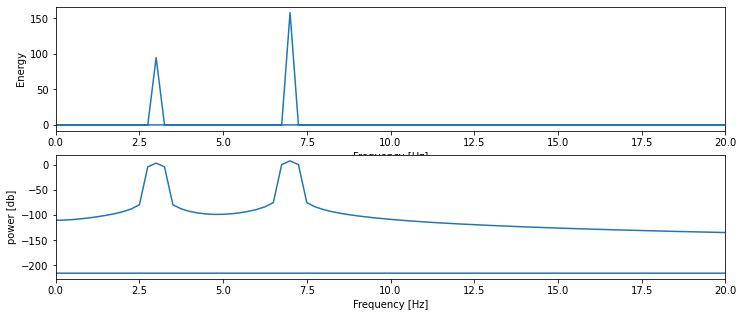

In [111]:
%matplotlib inline

y = signals[:,2]                               # renaming data
N = x.shape[0]                           # number of samples
dt = 1/1000                              # frequency resolution, reminder
T = 4                                    # total duration, reminder

Y = fft(y) / np.sqrt(N)                   # Compute Fourier transform of x
ref = 1
freq = np.fft.fftfreq(N, dt)                    # get frequency values
bla = np.fft.fft(y)
win = np.hamming(N)
Y_win = fft(y*(win/sum(win)))
Y_dbfs = 20 * np.log10(np.abs(Y_win / ref)) 

fig, ax = plt.subplots(figsize=(12,5), nrows=2)
ax[0].plot(freq, np.abs(Y))  
# ax[0].plot(freq, np.abs(xf))
ax[0].set_xlim([0, 20])                       # Select frequency range
ax[0].set_xlabel('Frequency [Hz]')             # Label the axes
ax[0].set_ylabel('Energy')


ax[1].plot(freq, Y_dbfs)
ax[1].set_xlim([0, 20])                       # Select frequency range
ax[1].set_xlabel('Frequency [Hz]')   
ax[1].set_ylabel('power [db]')

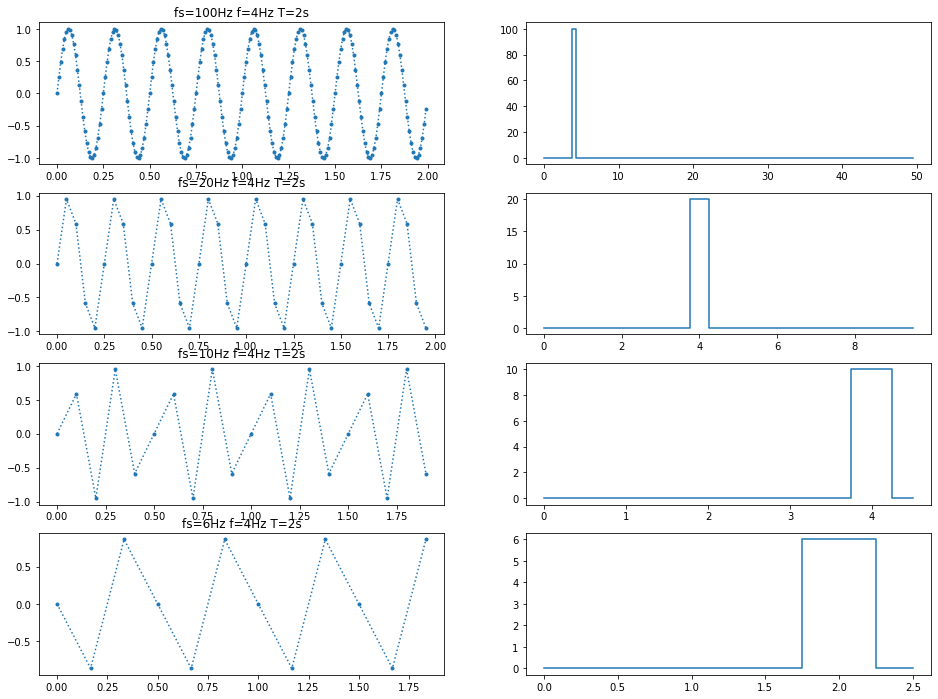

In [115]:
f = 4  # Frequency of the sine wave [Hz]
T = 2  # Duration of the sine wave [s]
fss = [100, 20, 10, 6] # Sampling frequencies [samples/s]

fig, ax = plt.subplots(figsize=(16,12), nrows=4, ncols=2)

for i, fs in enumerate(fss):
    x = np.arange(0,T,1/fs)
    midp = int(x.shape[0] * .5)
    y = np.sin(x*f*math.pi*2)
    ax[i,0].plot(x,y,'.:')
    ax[i,0].set_title(f'fs={fs}Hz f={f}Hz T={T}s')
    p = np.fft.fft(y)
    ax[i,1].step(x[:midp]*fs/T,abs(p[:midp]),where='mid')